# Data Analysis & Preprocessing

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

## Load the datasets

- Diffusion FER dataset
- Kaggle dataset

Combine the two datasets and save them in a new file.

In [3]:
df_fer = pd.read_csv('aus_diffusion_fer.csv')
print(f"Number of samples in DiffussionFER dataset: {len(df_fer)}")

df_kaggle = pd.read_csv('aus_kaggle_set.csv')
print(f"Number of samples in Kaggle dataset: {len(df_kaggle)}")

df = pd.concat([df_fer, df_kaggle])

df.to_csv('aus_combined.csv', index=False)

Number of samples in DiffussionFER dataset: 985
Number of samples in Kaggle dataset: 4226


## Analyse the dataset

- Distribution of the labels
- Statistics of the AU columns
- Correlation between the AU columns
- Correlation between the AU columns and the labels

In [19]:
df = pd.read_csv('aus_combined.csv')
print(f"Number of samples: {len(df)}")

Number of samples: 5211


In [4]:
display(df.head())

,emotion,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,...,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
0,angry,0.620479,0.118685,0.945737,0.347696,0.479924,1.0,0.648181,0.471817,0.0,...,0.342563,0.349243,0.347355,1.0,0.524340,0.075899,0.998926,0.386287,0.199486,0.500751
1,angry,0.305357,0.180906,0.235206,0.342715,0.061214,0.0,0.126671,0.000762,1.0,...,0.350962,0.071316,0.389307,0.0,0.249574,0.311360,0.104842,0.189397,0.022238,0.055599
2,angry,0.378199,0.249940,0.772075,0.319528,0.241064,0.0,0.275965,0.303089,0.0,...,0.170352,0.597198,0.327374,1.0,0.548546,0.121838,0.996710,0.900370,0.117350,0.275974
3,angry,0.457735,0.376821,0.752935,0.562280,0.154958,0.0,0.141288,0.600141,1.0,...,0.105309,0.351527,0.242159,1.0,0.341879,0.008724,0.999867,0.508911,0.066660,0.044055
4,angry,0.577783,0.270650,0.776813,0.467973,0.212671,0.0,0.109306,0.171478,0.0,...,0.082181,0.102049,0.382193,1.0,0.381744,0.026969,0.999138,0.675637,0.172266,0.112012


### Target label

<Axes: title={'center': 'Emotion Distribution'}, xlabel='Emotion', ylabel='Frequency'>

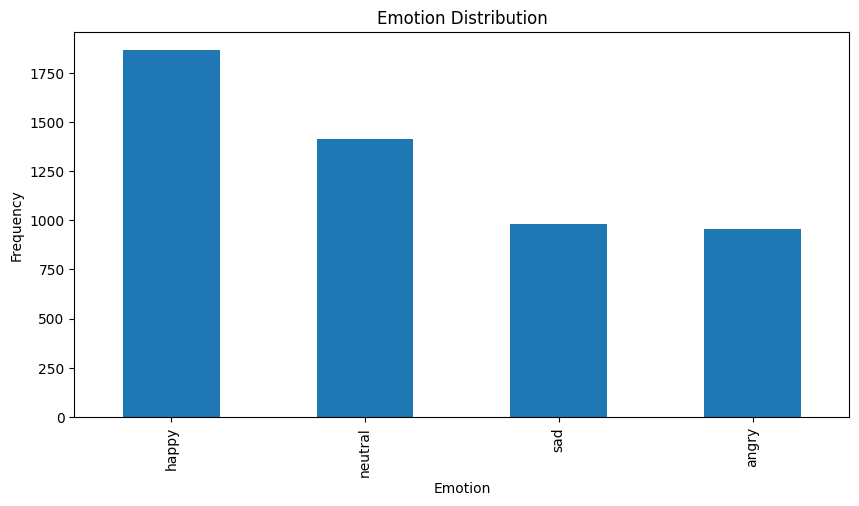

In [10]:
# plot the distribution of the target variable
labels = ['angry', 'happy', 'neutral', 'sad']
sorted_counts = df['emotion'].value_counts().reindex(labels).sort_values(ascending=False)

# Plot the sorted value counts
sorted_counts.plot(kind='bar', figsize=(10, 5), title='Emotion Distribution', xlabel="Emotion", ylabel="Frequency")

In [13]:
print(f"Ratio of samples in each class:\n{df['emotion'].value_counts(normalize=True)}")

Ratio of samples in each class:
emotion
happy      0.357705
neutral    0.270773
sad        0.187872
angry      0.183650
Name: proportion, dtype: float64


The target label doesn't have a strong class imbalance.

### AU columns

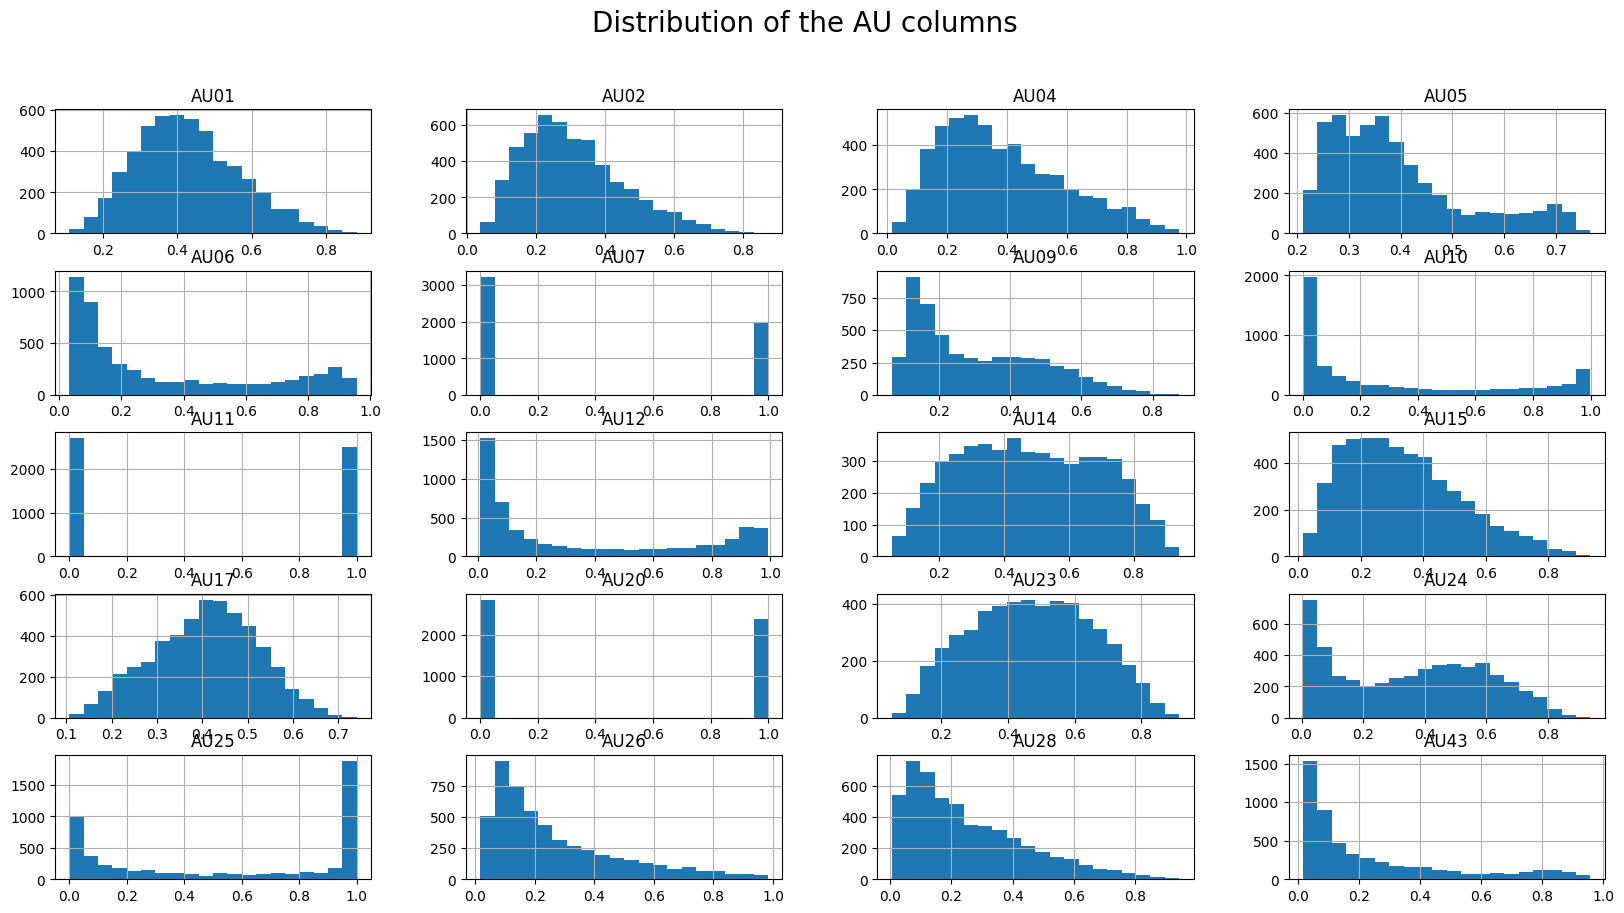

In [17]:
# analyze the distribution of the features
df.hist(figsize=(20, 10), bins=20)
plt.suptitle("Distribution of the AU columns", fontsize=20)
plt.show()

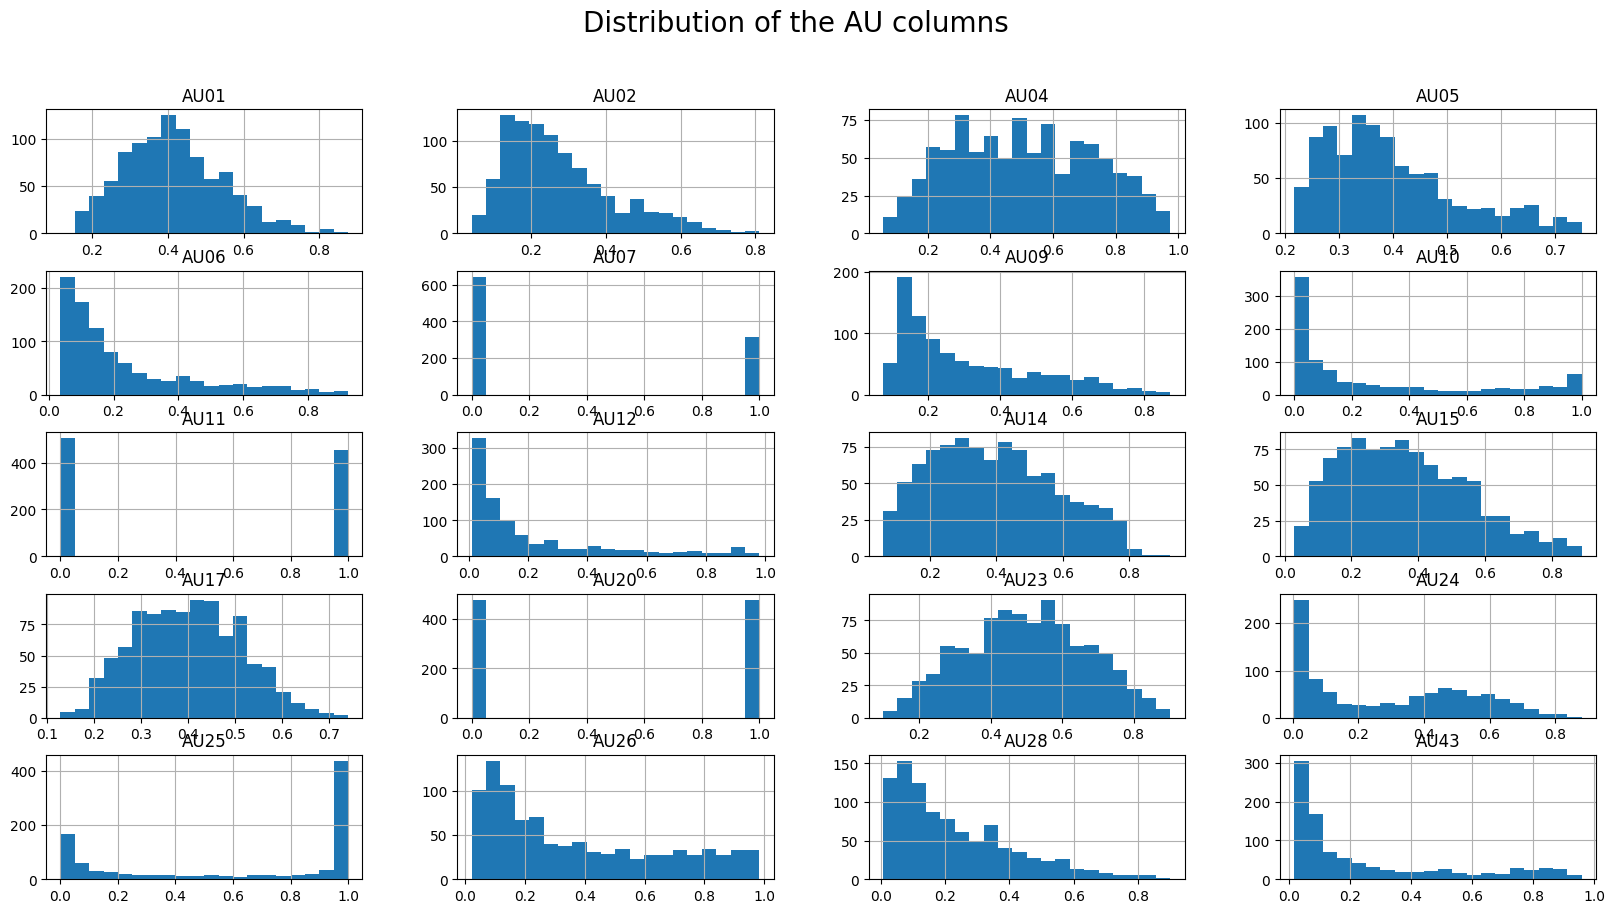

In [19]:
# analyze the distribution of the features for each class
df[df['emotion'] == 'angry'].hist(figsize=(20, 10), bins=20)
plt.suptitle("Distribution of the AU columns for 'angry' emotions", fontsize=20)
plt.show()

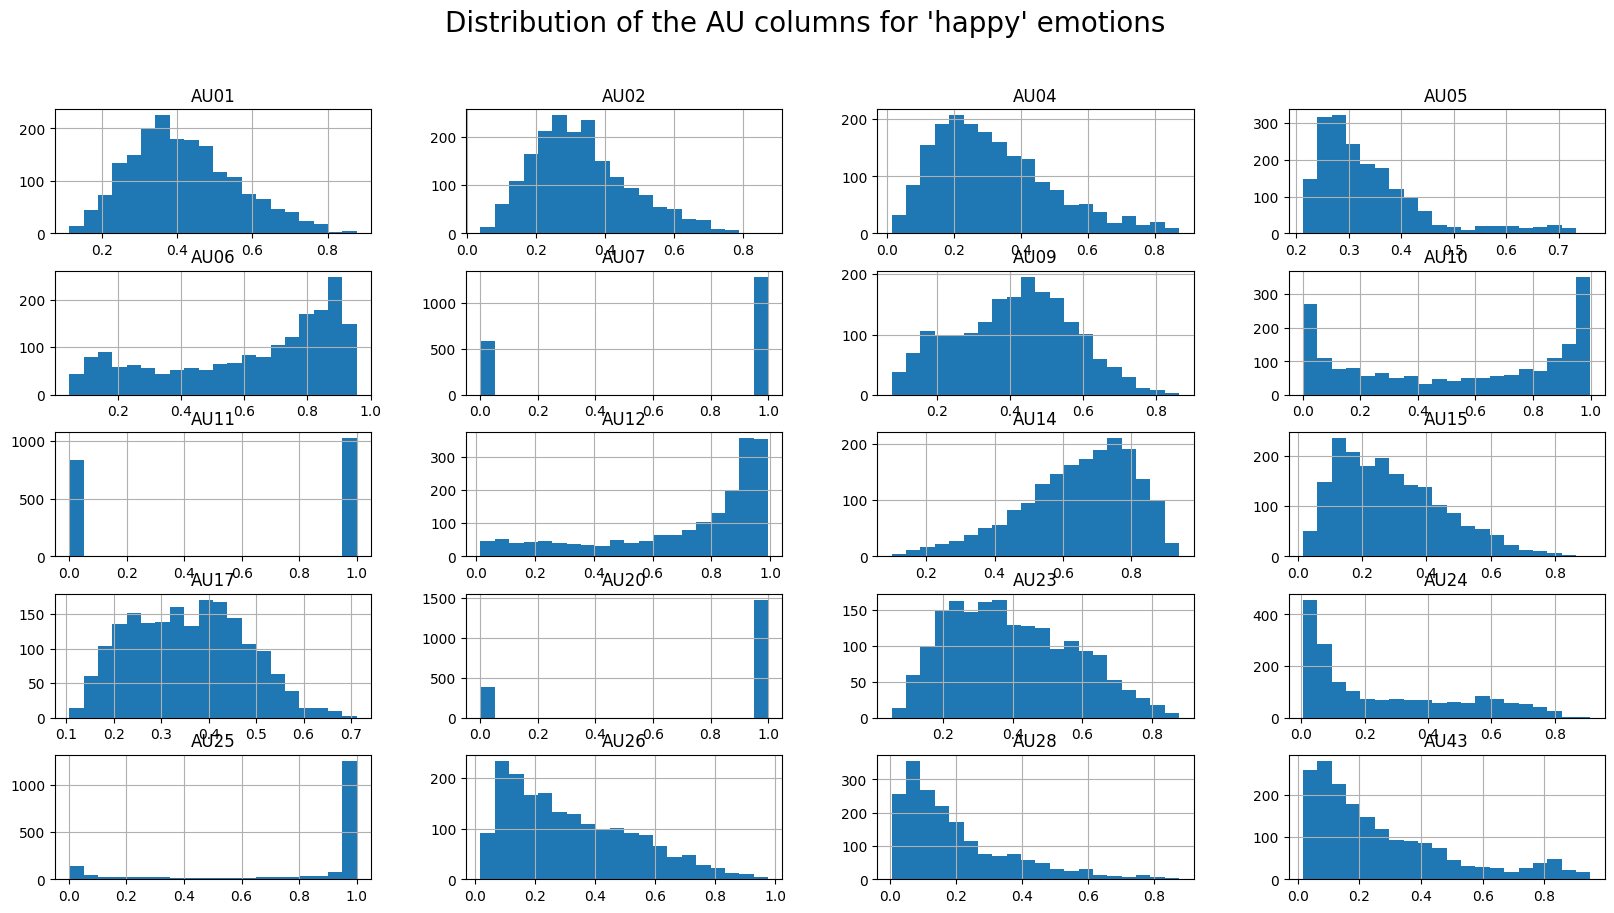

In [23]:
df[df['emotion'] == 'happy'].hist(figsize=(20, 10), bins=20)
plt.suptitle("Distribution of the AU columns for 'happy' emotions", fontsize=20)
plt.show()

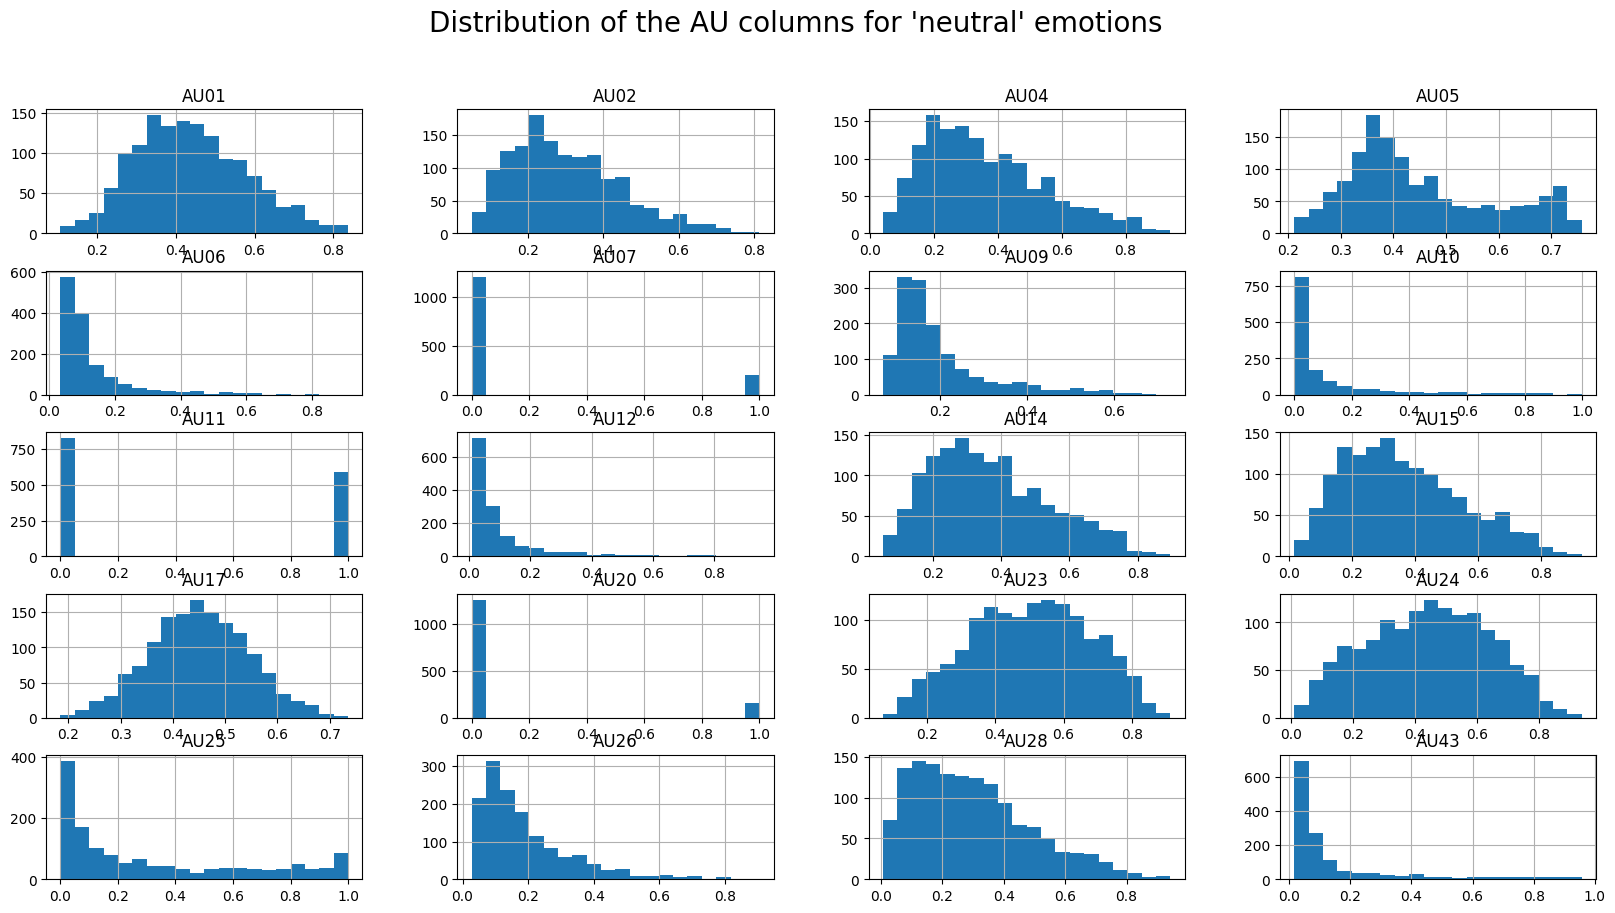

In [24]:
df[df['emotion'] == 'neutral'].hist(figsize=(20, 10), bins=20)
plt.suptitle("Distribution of the AU columns for 'neutral' emotions", fontsize=20)
plt.show()

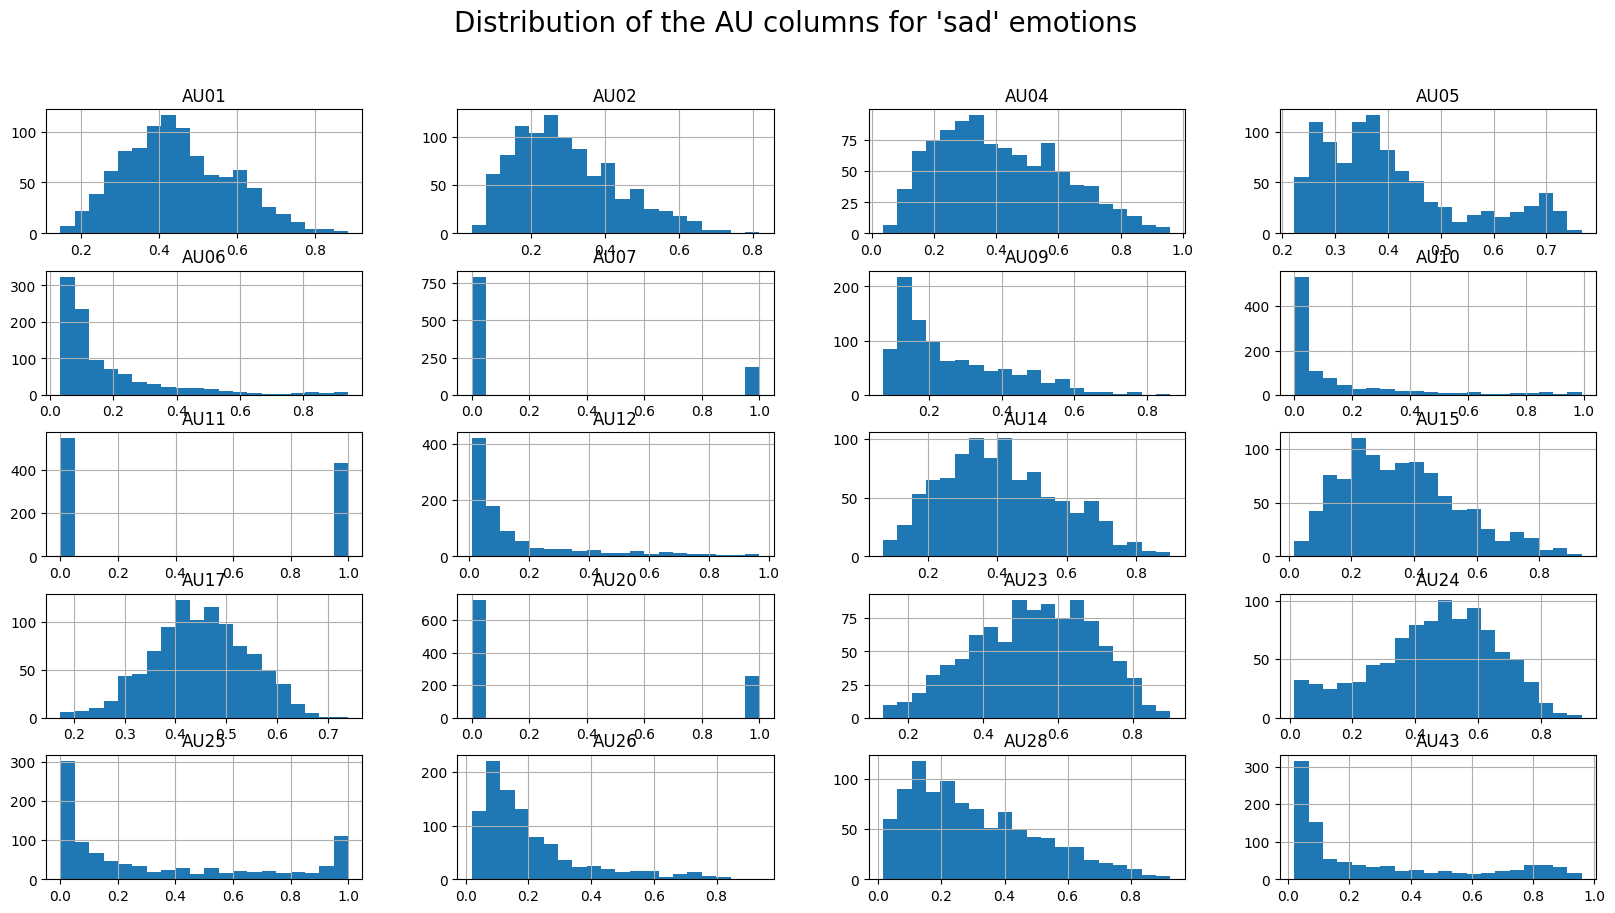

In [25]:
df[df['emotion'] == 'sad'].hist(figsize=(20, 10), bins=20)
plt.suptitle("Distribution of the AU columns for 'sad' emotions", fontsize=20)
plt.show()

The AU columns have different distributions for the different labels.

--> Evaluate this further with an correlation analysis.

In [26]:
display(df.describe())

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
count,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.00000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000
mean,0.428276,0.307915,0.382593,0.392868,0.332700,0.38023,0.308164,0.303322,0.479463,0.355818,0.479810,0.336537,0.407542,0.454702,0.471005,0.354336,0.553197,0.273322,0.252524,0.241024
std,0.138318,0.145106,0.203340,0.131063,0.298926,0.48549,0.176106,0.349762,0.499626,0.354573,0.210617,0.181962,0.114883,0.497992,0.181091,0.238999,0.413808,0.217194,0.190659,0.250244
min,0.108008,0.037726,0.014772,0.211520,0.032311,0.00000,0.068154,0.000005,0.000000,0.008491,0.054786,0.015036,0.106438,0.000000,0.051778,0.004412,0.000364,0.018193,0.005142,0.015969
25%,0.327232,0.198486,0.222189,0.291726,0.084014,0.00000,0.153306,0.017731,0.000000,0.047919,0.305266,0.190888,0.327128,0.000000,0.329386,0.114428,0.089856,0.107211,0.099344,0.056164
50%,0.416185,0.283645,0.343593,0.360903,0.183497,0.00000,0.259195,0.120239,0.000000,0.166028,0.472855,0.311779,0.412973,0.000000,0.471547,0.368704,0.626335,0.196512,0.203204,0.125181
75%,0.519255,0.392868,0.516917,0.449483,0.585050,1.00000,0.443806,0.582146,1.000000,0.732326,0.655655,0.454517,0.489501,1.000000,0.610041,0.555679,0.994475,0.384445,0.365556,0.347883
max,0.883882,0.873397,0.975791,0.766683,0.956267,1.00000,0.874803,0.999884,1.000000,0.992795,0.940743,0.935029,0.741210,1.000000,0.913260,0.937763,0.999998,0.983479,0.943230,0.958853


The statistics of the AU columns doesn't indicate any outliers.

### Correlation analysis

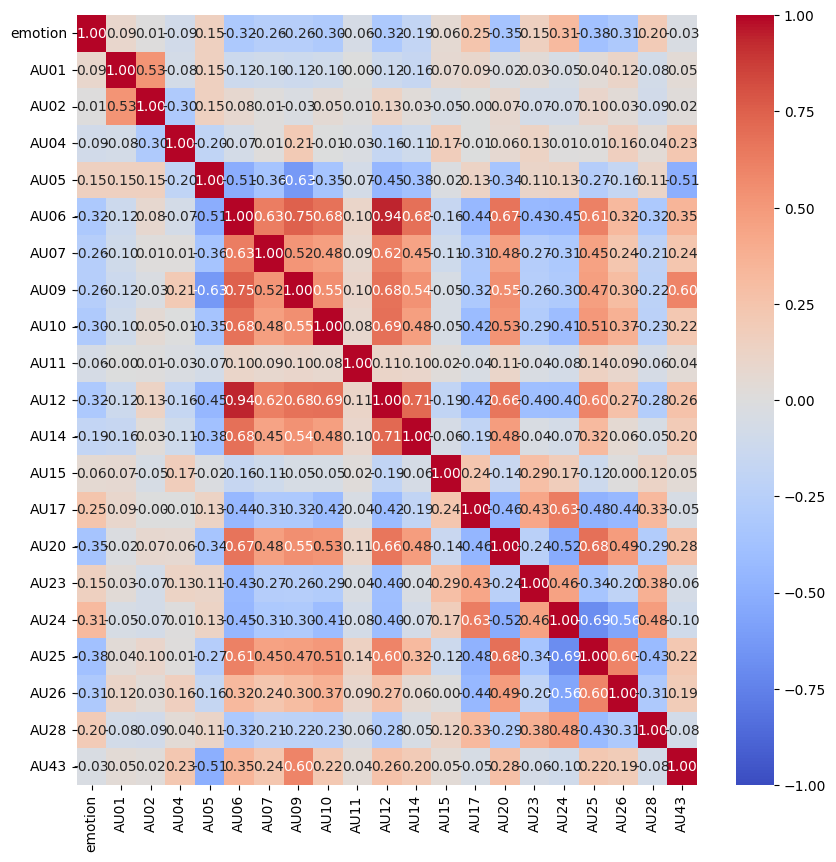

In [35]:
df_corr = df.copy()
df_corr['emotion'] = pd.factorize(df_corr['emotion'])[0]
corr = df_corr.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.show()

The correlation matrices show that there are some strong correlations between the AU columns. Examples are:
- AU06 and AU12
- AU06 and AU09
- AU10 and AU12

Reduce the the number of AU columns by applying PCA or similar reduction methods.

The correlation matrices also show that there are some correlations between the AU columns and the labels. Examples are:
- AU06
- AU20
- AU25
- AU28

## Data cleaning

In [20]:
df = df.drop_duplicates()
df = df.dropna()

print(f"Number of samples after removing duplicates: {len(df)}")

Number of samples after removing duplicates: 5180


## Data Preprocessing

- Split the data into train and test set
- Scale the AU columns
- Apply PCA to reduce the number of AU columns
- Encode the labels
- Save the preprocessed data

In [21]:
# split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42, stratify=df['emotion'])

print(f"Number of training samples: {len(train_df)}")
print(f"Number of testing samples: {len(test_df)}")

Number of training samples: 4662
Number of testing samples: 518


In [22]:
au_column_labels = df.columns[1:]

# scale the au columns
scaler = StandardScaler().fit(train_df[au_column_labels])
train_df[au_column_labels] = scaler.transform(train_df[au_column_labels])
test_df[au_column_labels] = scaler.transform(test_df[au_column_labels])

In [23]:
# save the datasets without PCA
train_df.to_csv('train_wo_pca.csv', index=False)
test_df.to_csv('test_wo_pca.csv', index=False)

In [24]:
# apply pca to the au columns
pca = PCA(n_components=0.80)
pca.fit(train_df[au_column_labels])
print(f"Number of components: {pca.n_components_}")
train_df_pca = pd.DataFrame(pca.transform(train_df[au_column_labels]))
test_df_pca = pd.DataFrame(pca.transform(test_df[au_column_labels]))

# combine the pca components with the emotion column
train_df_pca['emotion'] = train_df['emotion'].values
test_df_pca['emotion'] = test_df['emotion'].values

display(train_df_pca.head())

Number of components: 9


,0,1,2,3,4,5,6,7,8,emotion
0,0.386804,-1.032445,-1.340550,0.013032,0.415708,1.561309,-1.426308,0.035611,0.691675,happy
1,-0.261597,-1.448896,-2.068918,-0.539162,0.210874,1.212153,1.092173,1.030549,-0.455075,happy
2,3.705577,-0.047366,-1.257501,-0.066793,1.142134,-0.496152,1.245207,-0.298990,0.679973,happy
3,-0.041848,-1.877469,-0.797383,-2.120524,-0.307475,-1.640534,0.607437,0.316840,0.608154,neutral
4,3.025449,1.495383,-0.987689,0.428227,0.019264,1.474355,-1.168174,-0.907020,0.782868,happy


In [25]:
# save the scaler, pca, and train/test dataframes
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(pca, open('pca.pkl', 'wb'))
train_df_pca.to_csv('train.csv', index=False)
test_df_pca.to_csv('test.csv', index=False)